In [31]:
#we are importing the libraries :numpy (scientific calculations), matplotlib (plotting)
import numpy as np
import matplotlib.pyplot as plt

In [32]:
np.random.seed(0) #for reproducibility

In [51]:
dogs_whisker_length= np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)

In [52]:
dogs_whisker_length

array([6.0685094 , 4.5466142 , 4.31216239, 3.7859226 , 4.55907737,
       4.7196445 , 4.63530646, 5.15670386, 5.5785215 , 5.34965446])

In [53]:
dogs_ear_flappiness_index

array([7.23585608, 6.56220853, 9.36453185, 7.31055082, 7.3477064 ,
       7.47881069, 6.15693045, 7.522026  , 7.52034419, 8.6203583 ])

In [54]:
cat_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cat_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [55]:
cat_whisker_length

array([8.69845715, 8.00377089, 8.93184837, 8.33996498, 7.98431789,
       8.16092817, 7.80934651, 7.60515049, 7.73226646, 6.87198867])

In [56]:
cat_ear_flappiness_index

array([5.28044171, 4.00687639, 5.84163126, 4.75054142, 5.04949498,
       5.49383678, 5.64331447, 3.42937659, 4.79309632, 5.88017891])

# visualize the data points

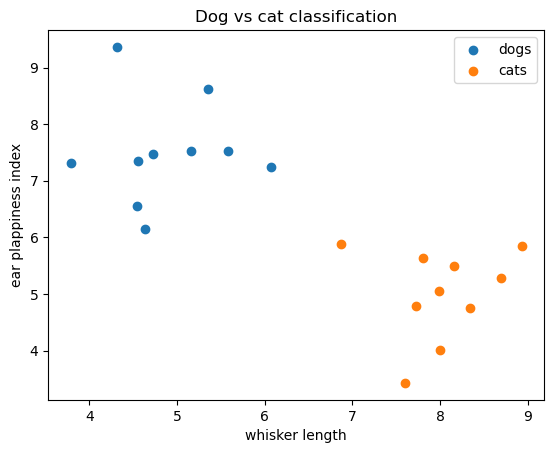

In [57]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="dogs")
plt.scatter(cat_whisker_length,cat_ear_flappiness_index,label="cats")
plt.xlabel("whisker length")
plt.ylabel("ear plappiness index")
plt.title("Dog vs cat classification")
plt.legend()
plt.show()

#  Implement Random Linear Classifier Algorithm

In [58]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    #d is the number of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0= np.random.normal()

        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error <best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta, best_theta0

# Compute Error

In [59]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <= 0:
            error += 1 
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0 > 0:
            error += 1
    return error

In [60]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=  np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T


In [61]:
dogs_data

array([[6.0685094 , 7.23585608],
       [4.5466142 , 6.56220853],
       [4.31216239, 9.36453185],
       [3.7859226 , 7.31055082],
       [4.55907737, 7.3477064 ],
       [4.7196445 , 7.47881069],
       [4.63530646, 6.15693045],
       [5.15670386, 7.522026  ],
       [5.5785215 , 7.52034419],
       [5.34965446, 8.6203583 ]])

In [44]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

# Run the Algo

In [45]:
k=100
d=2
best_theta,best_theta0=random_linear_classifier(dogs_data,cats_data,k,d)


In [46]:
best_theta

array([-1.07075262,  1.05445173])

In [47]:
best_theta0

-0.40317694697317963

In [48]:
x_vals= np.linspace(2,10,100)
y_vals= (-best_theta[0]/best_theta[1])*x_vals-(best_theta0/best_theta[1])

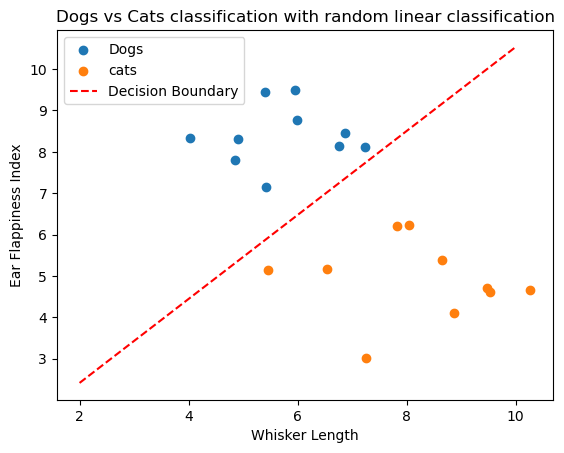

In [49]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="Dogs")
plt.scatter(cat_whisker_length,cat_ear_flappiness_index,label="cats")
plt.plot(x_vals,y_vals,color="red",linestyle="--",label="Decision Boundary")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.title("Dogs vs Cats classification with random linear classification")
plt.legend()
plt.show()